## Import Libraries 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt

In [2]:
import matplotlib
matplotlib.__version__

'3.7.1'

In [3]:
df = pd.read_csv('citibike_weather_cleaned_2022.csv', index_col = 0)

C:\Users\beaac\AppData\Local\Temp\ipykernel_18284\3026167464.py:1: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('citibike_weather_cleaned_2022.csv', index_col = 0)


In [4]:
df.columns 

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'start_time', 'date', 'avgTemp', '_merge'],
      dtype='object')

In [5]:
df.drop(columns = {'_merge'}, inplace = True)

In [6]:
df. head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_time,date,avgTemp
0,BFD29218AB271154,electric_bike,2022-01-21 13:13:43.392,2022-01-21 13:22:31.463,West End Ave & W 107 St,7650.05,Mt Morris Park W & W 120 St,7685.14,40.802117,-73.968181,40.804038,-73.945925,member,2022-01-21 13:13:43.392,2022-01-21,-6.0
1,7C953F2FD7BE1302,classic_bike,2022-01-10 11:30:54.162,2022-01-10 11:41:43.422,4 Ave & 3 St,4028.04,Boerum Pl\t& Pacific St,4488.09,40.673746,-73.985649,40.688489,-73.991160,member,2022-01-10 11:30:54.162,2022-01-10,1.6
2,95893ABD40CED4B8,electric_bike,2022-01-26 10:52:43.096,2022-01-26 11:06:35.227,1 Ave & E 62 St,6753.08,5 Ave & E 29 St,6248.06,40.761227,-73.960940,40.745168,-73.986831,member,2022-01-26 10:52:43.096,2022-01-26,-2.3
3,F853B50772137378,classic_bike,2022-01-03 08:35:48.247,2022-01-03 09:10:50.475,2 Ave & E 96 St,7338.02,5 Ave & E 29 St,6248.06,40.783964,-73.947167,40.745168,-73.986831,member,2022-01-03 08:35:48.247,2022-01-03,1.4
4,7590ADF834797B4B,classic_bike,2022-01-22 14:14:23.043,2022-01-22 14:34:57.474,6 Ave & W 34 St,6364.1,5 Ave & E 29 St,6248.06,40.749640,-73.988050,40.745168,-73.986831,member,2022-01-22 14:14:23.043,2022-01-22,-5.9


In [7]:
df.shape

(29768282, 16)

In [8]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
start_time             object
date                   object
avgTemp               float64
dtype: object

In [9]:
# convert columns to datetime
df['started_at'] = pd.to_datetime(df['started_at'], errors='coerce')
df['ended_at'] = pd.to_datetime(df['ended_at'], errors='coerce')
df['start_time'] = pd.to_datetime(df['start_time'], errors='coerce')
df['date'] = pd.to_datetime(df['date'], errors='coerce')


In [11]:
df.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
start_time            datetime64[ns]
date                  datetime64[ns]
avgTemp                      float64
dtype: object

## Basic Plotting with Pandas

In [12]:
df_temp = df.set_index('date')

In [13]:
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_time,avgTemp
date,,,,,,,,,,,,,,,
2022-01-21,BFD29218AB271154,electric_bike,2022-01-21 13:13:43.392,2022-01-21 13:22:31.463,West End Ave & W 107 St,7650.05,Mt Morris Park W & W 120 St,7685.14,40.802117,-73.968181,40.804038,-73.945925,member,2022-01-21 13:13:43.392,-6.0
2022-01-10,7C953F2FD7BE1302,classic_bike,2022-01-10 11:30:54.162,2022-01-10 11:41:43.422,4 Ave & 3 St,4028.04,Boerum Pl\t& Pacific St,4488.09,40.673746,-73.985649,40.688489,-73.991160,member,2022-01-10 11:30:54.162,1.6
2022-01-26,95893ABD40CED4B8,electric_bike,2022-01-26 10:52:43.096,2022-01-26 11:06:35.227,1 Ave & E 62 St,6753.08,5 Ave & E 29 St,6248.06,40.761227,-73.960940,40.745168,-73.986831,member,2022-01-26 10:52:43.096,-2.3
2022-01-03,F853B50772137378,classic_bike,2022-01-03 08:35:48.247,2022-01-03 09:10:50.475,2 Ave & E 96 St,7338.02,5 Ave & E 29 St,6248.06,40.783964,-73.947167,40.745168,-73.986831,member,2022-01-03 08:35:48.247,1.4
2022-01-22,7590ADF834797B4B,classic_bike,2022-01-22 14:14:23.043,2022-01-22 14:34:57.474,6 Ave & W 34 St,6364.1,5 Ave & E 29 St,6248.06,40.749640,-73.988050,40.745168,-73.986831,member,2022-01-22 14:14:23.043,-5.9


<Axes: xlabel='date'>

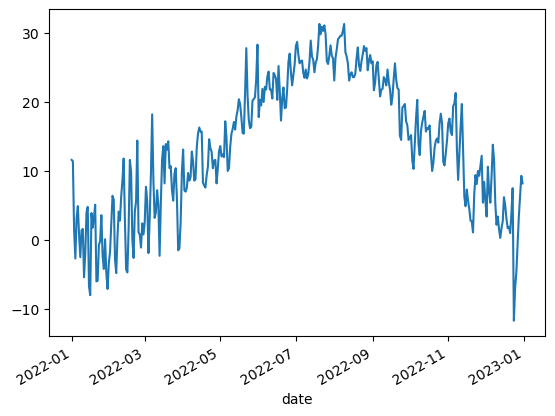

In [14]:
df_temp['avgTemp'].plot()

## Aggreate trips

In [16]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'start_time', 'date', 'avgTemp'],
      dtype='object')

In [18]:
#Group the count of the trips 
df_group = pd.DataFrame(df.groupby(['date'])['ride_id'].count()).reset_index()

In [19]:
df_group.head()

,date,ride_id
0,2022-01-01,20198
1,2022-01-02,42203
2,2022-01-03,32453
3,2022-01-04,35869
4,2022-01-05,33689


In [20]:
# Merge df_group with weather dataframe
df_group.rename(columns = {'ride_id':'bike_rides_daily'}, inplace = True)
df = df.merge(df_group, on = "date", how = 'outer', indicator = True)
print(df['_merge'].value_counts(dropna = False))
print("Shape of January 1st is", df[df['date'] == '2022-01-01'].shape) # Check 
print("Shape of January 2nd is", df[df['date'] == '2022-01-02'].shape) # Second check 

df_temp = df.set_index('date')

print(df_temp.columns)

both          29768282
left_only            0
right_only           0
Name: _merge, dtype: int64
Shape of January 1st is (20198, 18)
Shape of January 2nd is (42203, 18)
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'start_time', 'avgTemp', 'bike_rides_daily', '_merge'],
      dtype='object')


In [21]:
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_time,avgTemp,bike_rides_daily,_merge
date,,,,,,,,,,,,,,,,,
2022-01-21,BFD29218AB271154,electric_bike,2022-01-21 13:13:43.392,2022-01-21 13:22:31.463,West End Ave & W 107 St,7650.05,Mt Morris Park W & W 120 St,7685.14,40.802117,-73.968181,40.804038,-73.945925,member,2022-01-21 13:13:43.392,-6.0,33490,both
2022-01-21,096AE4C21473D1D6,electric_bike,2022-01-21 20:32:55.968,2022-01-21 20:35:20.227,Riverside Dr & W 91 St,7524.16,Riverside Dr & W 82 St,7388.1,40.793135,-73.977004,40.787209,-73.981281,member,2022-01-21 20:32:55.968,-6.0,33490,both
2022-01-21,B3996D7CAEDF7B92,classic_bike,2022-01-21 09:14:04.856,2022-01-21 09:18:53.000,Henry St & Atlantic Ave,4531.05,Clinton St & Tillary St,4748.07,40.690893,-73.996123,40.696233,-73.991421,member,2022-01-21 09:14:04.856,-6.0,33490,both
2022-01-21,83AE874442FFF355,electric_bike,2022-01-21 17:30:27.244,2022-01-21 17:36:00.300,Cleveland Pl & Spring St,5492.05,Rivington St & Ridge St,5406.02,40.722104,-73.997249,40.718502,-73.983299,member,2022-01-21 17:30:27.244,-6.0,33490,both
2022-01-21,8B1950B6ED5BD50A,electric_bike,2022-01-21 10:12:57.242,2022-01-21 10:31:37.016,1 Ave & E 62 St,6753.08,Allen St & Rivington St,5414.06,40.761227,-73.960940,40.720196,-73.989978,member,2022-01-21 10:12:57.242,-6.0,33490,both


In [33]:
df_temp.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
start_time            datetime64[ns]
avgTemp                      float64
bike_rides_daily               int64
_merge                      category
dtype: object

In [36]:
daily_df = df_temp.groupby(df_temp.index)['bike_rides_daily'].first()

In [38]:
daily_temp = df_temp.groupby(df_temp.index)['avgTemp'].first()

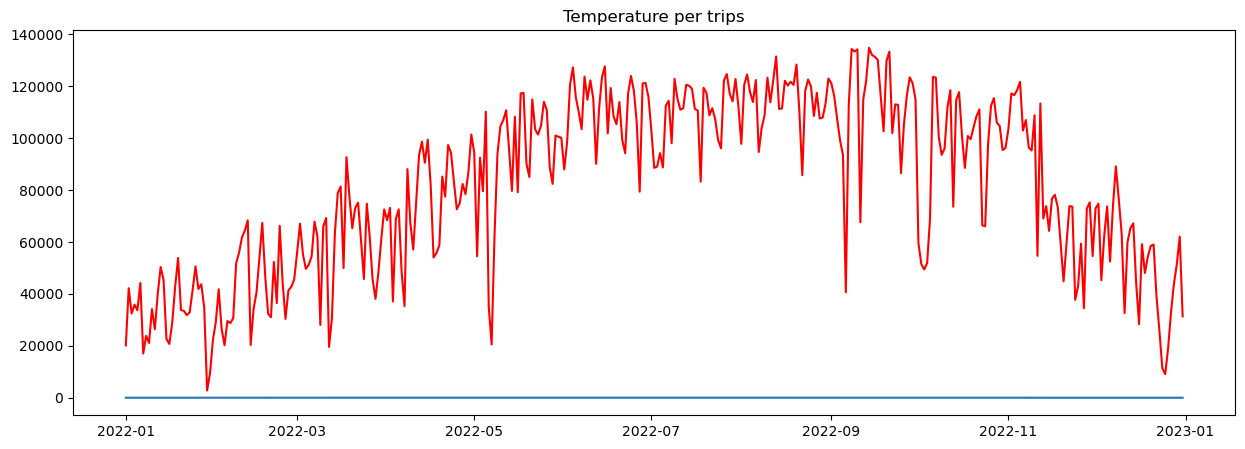

In [43]:
plt.figure(figsize=(15,5)) 
plt.title('Temperature per trips') 
plt.plot(daily_temp.index, daily_temp)
plt.plot(daily_df.index, daily_df, color = 'red')
plt.show()

## Dual axis plot

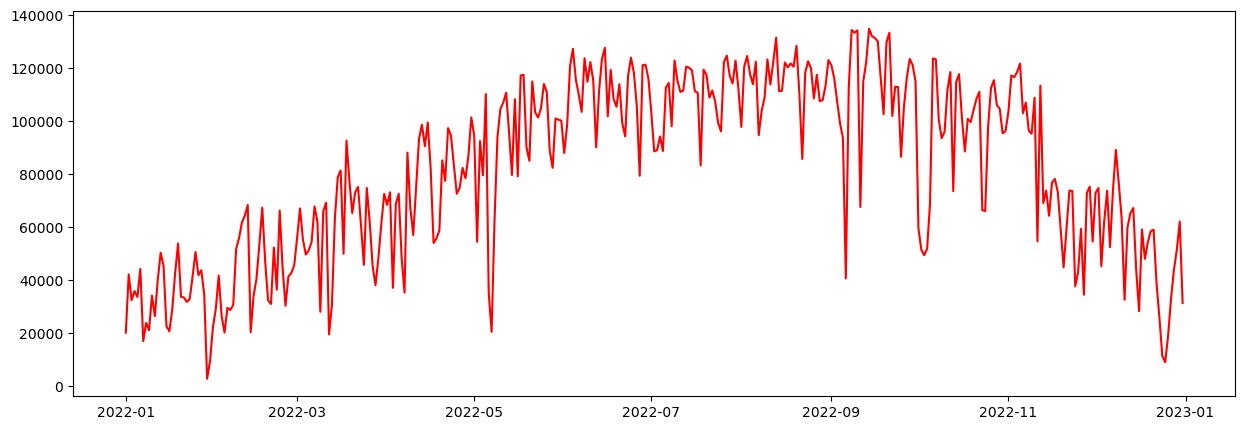

In [46]:
#Create fig and axis objects with subplots

fig,ax = plt.subplots(figsize=(15,5))

ax.plot(daily_df.index, daily_df,color = "red")

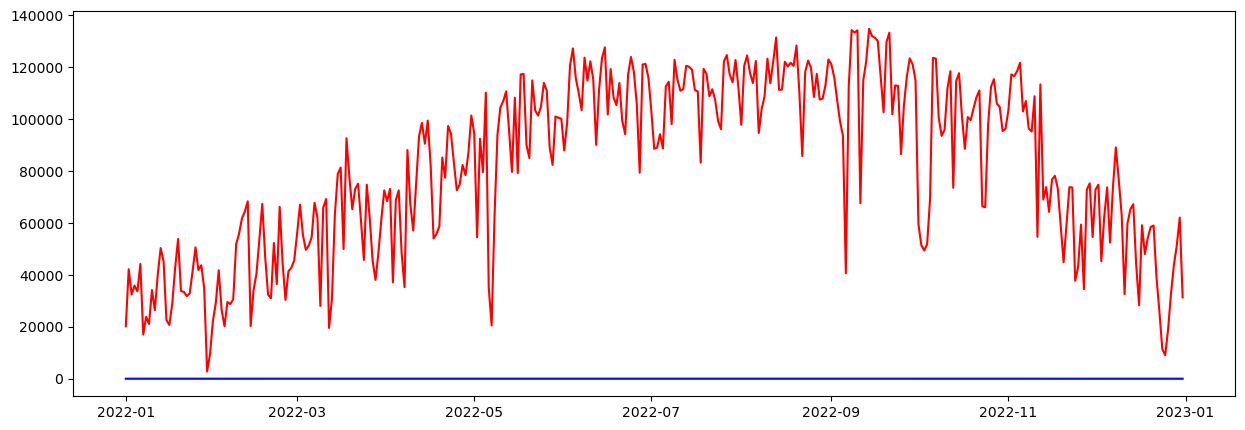

In [47]:
# Create figure and axis objects with subplots 
fig,ax = plt.subplots(figsize=(15,5))

ax.plot(daily_df.index, daily_df,color = "red")
ax.plot(daily_temp.index, daily_temp, color = "blue")

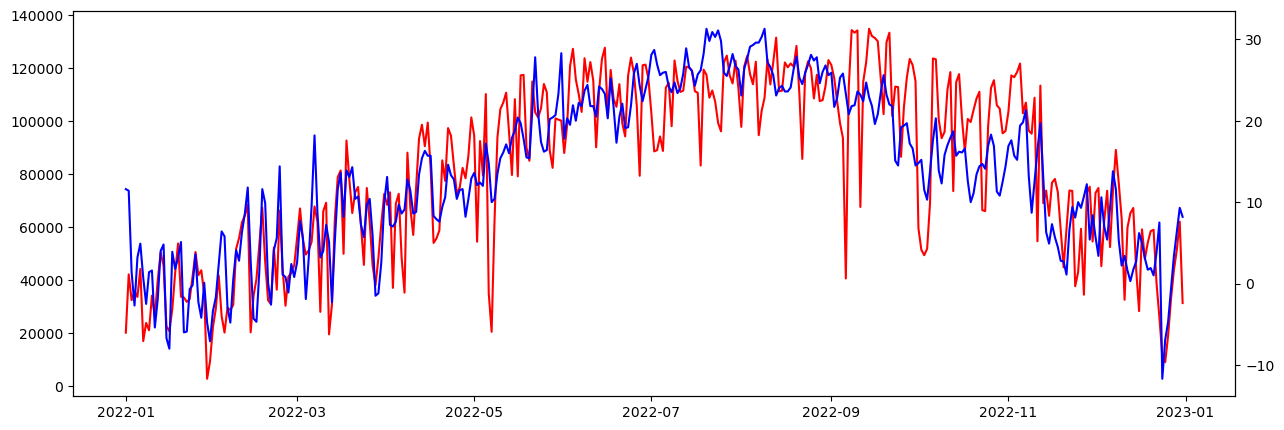

In [48]:
# Create figure and axis objects with subplots

fig,ax = plt.subplots(figsize=(15, 5))

# Make a plot of the bike rides
ax.plot(daily_df.index, daily_df,color = "red")

# Here is where we create the dual axis - initialize a twin object for two different y-axis on the sample plot
ax2 = ax.twinx()

# Make a plot with the temperatues on the y-axis using second axis object
ax2.plot(daily_temp.index, daily_temp, color = "blue")
plt.show()

## Final Dual Plot

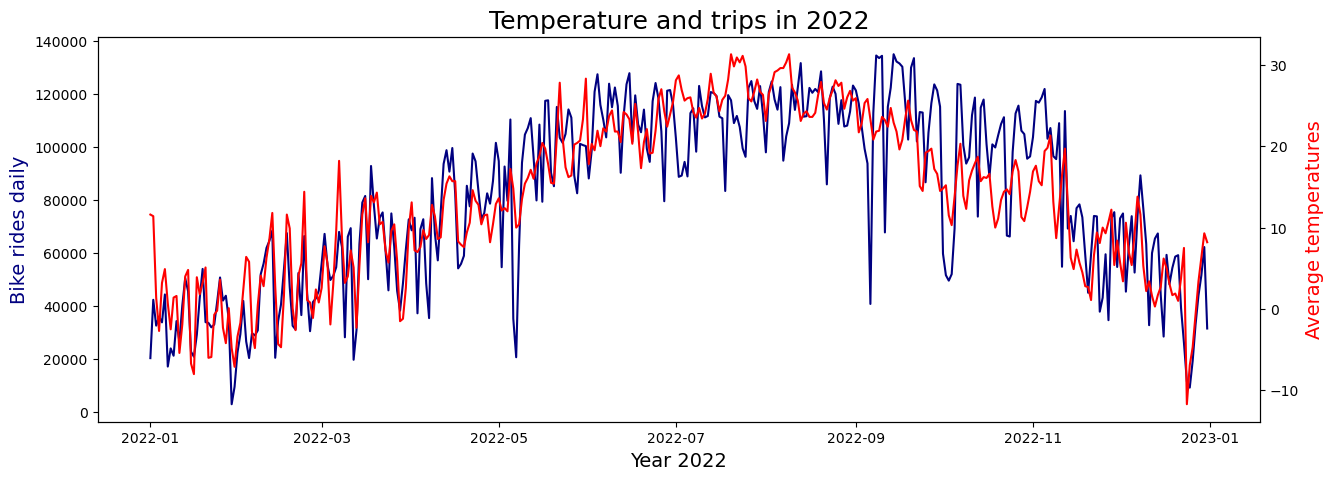

In [49]:
# Create figure and axis objects with subplots() and details

fig,ax = plt.subplots(figsize=(15, 5))

# Make a plot of the bike rides
ax.plot(daily_df.index, daily_df,color = "navy")
ax.set_xlabel("Year 2022", fontsize = 14) # set x-axis label
ax.set_ylabel("Bike rides daily",color = "navy", fontsize = 14) # set y-axis label

# Here is where we create the dual axis - initialize a twin object for two different y-axis on the sample plot
ax2 = ax.twinx()

# Make a plot with the temperatues on the y-axis using second axis object
ax2.plot(daily_temp.index, daily_temp, color = "red")
ax2.set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.title('Temperature and trips in 2022', fontsize = 18)
plt.show()

In [50]:
plt.style.use('ggplot')


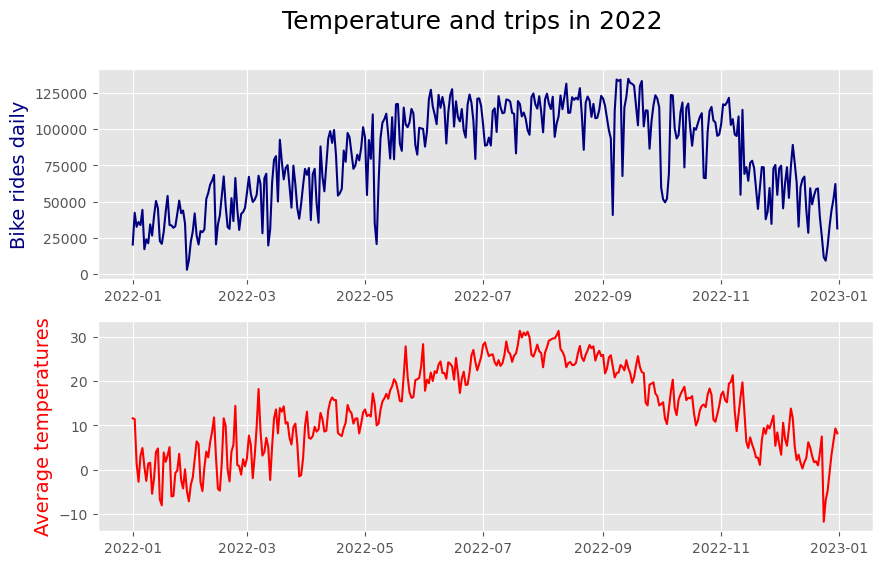

In [51]:
# Create figure and axis objects with subplots
fig,ax = plt.subplots(2, figsize =(10, 6))
# Make a plot of the bike rides 
ax[0].plot(daily_df.index, daily_df,color = "navy")
ax[0].set_ylabel("Bike rides daily",color = "navy", fontsize = 14) # set y-axis label

# Make a plot with the temperatures
ax[1].plot(daily_temp.index, daily_temp, color = "red")
ax[1].set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.suptitle('Temperature and trips in 2022', fontsize = 18)

plt.show()

In [52]:
# save the plot as a file
fig.savefig('Temperature_trips_22_dual.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

For Dual Axis line chart: Bike Rides Vs. Temperature in 2022

The visualization uses Matplotlibs object oriented paradigm (OOP) to create a dual-axis line chart comparing daily bike rides counts and average temperatures throughout 2022.

- Firts i define the figure and axis objects using fig, ax =plt.subplot
- The frist axis plots saily bike rides in navy with x and y-axes
- i created a twin axis  using ax.twinx(). This allows the temperature variable to be plotted on separate y-axis without distorting the bike ride trend.
- The second axis plots average temperature in red with x and y-axes
- Last thing a shared title is added with plt.title()